<div style="width: 90%; height: 100px; background-color: #D8D9DA; border: 3px solid #900C3F; text-align: center; line-height: 100px; color: #161616; font-size: 24px; font-weight: bold; border-radius:6px;">
    🍚 Rice Variety Classification (CNN) Using TensorFlow🌾
</div>

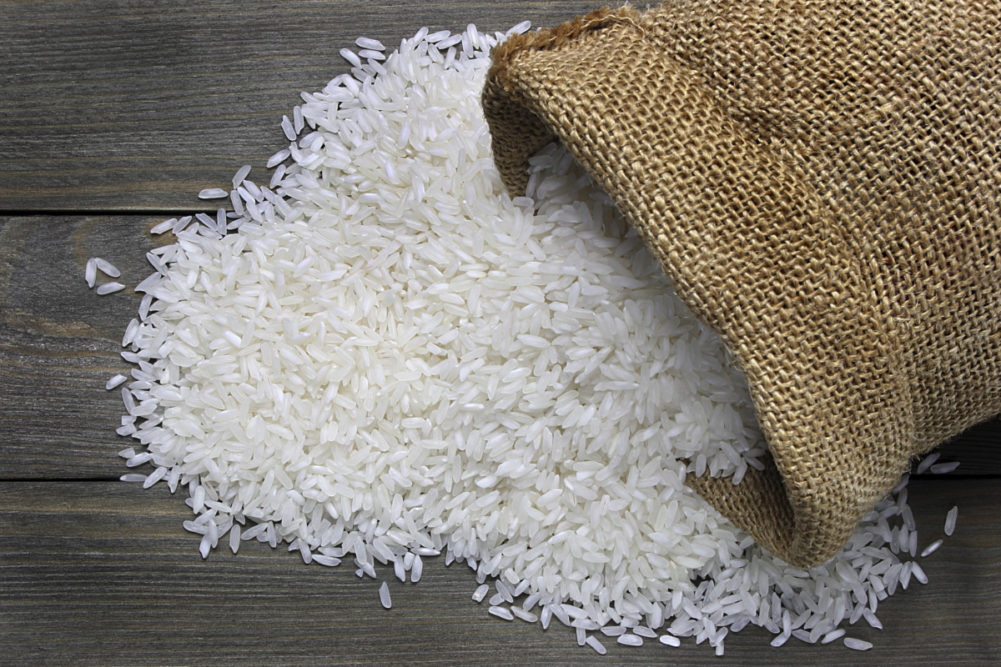

<div style="width: 90%; background-color: #D8D9DA; color: white; padding: 20px; border: 3px solid #900C3F; margin-bottom: 20px;border-radius:10px;">
    <h3 style="color: #900C3F;">Introduction</h3>
    <span style="color: #161616;">In this project, we explore rice classification using Convolutional Neural Networks (CNNs). CNNs are a powerful deep learning technique for image recognition and classification tasks. Our goal is to build and train a CNN model that can accurately classify different types of rice grains based on input images. By leveraging the capabilities of CNNs, we aim to achieve high classification accuracy and gain insights into the model's performance.
<br>
<br>
        created by : Amir Hossein Mirzaei     |     August 2023
</span> 
    <h3 style="color: #900C3F;">Tasks in this project</h3>
    <ul style="list-style-type: none; padding-left: 0; color: #161616;">
        <li><span style="margin-left: -10px;">&#8226;</span> Importing necessary libraries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Data Splitting and Dataset Preparation</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Building the CNN architecture</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Compiling the model</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Training the model</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Evaluating model performance</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Visualizing random predictions</li>
    </ul>
</div>

### <span style="color: #900C3F;">Importing necessary libraries</span>

In [1]:
!pip install split-folders
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 10.8 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import pandas as pd
import random
import cv2
import os
import pathlib
from splitfolders import ratio
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import visualkeras

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
base = '../input/rice-image-dataset/Rice_Image_Dataset'
base = pathlib.Path(base)

<hr style="position: absolute; bottom: -8px; border: none; height: 4px; width:99%; background-color: #900C3F;">

### <span style="color: #900C3F;">Data Splitting</span>

In [4]:
ratio(base, output='imgs', seed=123, ratio=(.7, .15, .15), group_prefix=None)

Copying files: 75000 files [08:32, 146.47 files/s]


In [5]:
rice_classes = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
rice = [sorted(os.listdir(f'imgs/train/{class_name}')) for class_name in rice_classes]

<hr style="position: absolute; bottom: -8px; border: none; height: 4px; width:99%; background-color: #900C3F;">

### <span style="color: #900C3F;">Dataset Information</span>
In this section, we gather some basic statistics about the dataset. The following information is obtained:

- ##### <span style="color: #900C3F;">Total Images:</span> The total number of images in the dataset is calculated using the len() function and the glob() method.
- ##### <span style="color: #900C3F;">Total Number of Classes:</span> The total number of distinct classes in the dataset is determined by checking the length of the rice_classes list.
- ##### <span style="color: #900C3F;">Images per Class:</span> The number of images in each class is calculated by iterating through the rice_classes and rice_count lists, where each entry in rice_count corresponds to the number of images for a specific class.

*This information provides an overview of the dataset's composition and class distribution.*

In [6]:
image_count = len(list(base.glob('*/*.jpg')))
print(f'Total images: {image_count}')
print('-'*30)
print(f'Total number of classes: {len(rice_classes)}')
print('-'*30)
rice_count = [len(rice_class) for rice_class in rice]
for class_name, count in zip(rice_classes, rice_count):
    print(f'Total {class_name} images: {count}')

Total images: 75000
------------------------------
Total number of classes: 5
------------------------------
Total Arborio images: 10500
Total Basmati images: 10500
Total Ipsala images: 10500
Total Jasmine images: 10500
Total Karacadag images: 10500


<hr style="position: absolute; bottom: -8px; border: none; height: 4px; width:99%; background-color: #900C3F;">

### <span style="color: #900C3F;">Sample Images from Each Class</span>

In this section, a visualization of sample images from each class is provided:

- For each class in `rice_classes`, a random image is chosen from the class's associated image files.
- The `plt.axis('off')` function is employed to remove axis labels from the subplots.

This visual representation offers a glimpse into the images belonging to each class within the dataset.

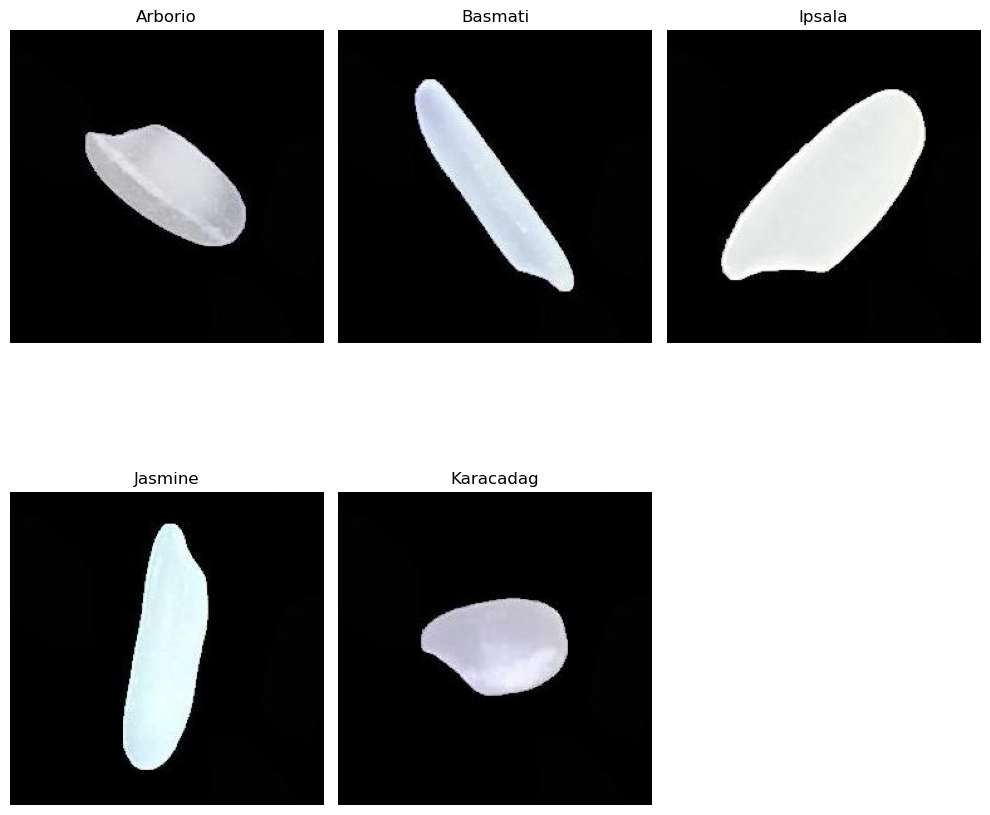

In [7]:
base = 'imgs'

plt.figure(figsize=(10, 10))
for i in range(len(rice_classes)):
    class_name = rice_classes[i]
    image_files = rice[i]
    image_path = os.path.join(base, 'train', class_name, random.choice(image_files))
    img = plt.imread(image_path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()

<hr style="position: absolute; bottom: -8px; border: none; height: 4px; width:99%; background-color: #900C3F;">

### <span style="color: #900C3F;">Image Data Preprocessing</span>

Prior to feeding the images into the model, the following preprocessing steps are conducted:

- A batch size of `128` is selected for efficient processing.
- The dimensions for resizing images are set as `175` pixels for both height and width.
- The `input_shape` for the model is defined as `(175, 175, 3)` to match the resized images with three color channels.
- The `ImageDataGenerator` is used to apply data augmentation and rescaling. Specifically, `rescale=1./255` ensures that pixel values are rescaled to the range [0, 1], facilitating neural network training.

These preprocessing steps contribute to enhancing the quality and efficiency of the data used for training, validation, and testing.


In [8]:
batch_size = 128
img_height, img_width = 175, 175
input_shape = (img_height, img_width, 3)

In [9]:
datagen = ImageDataGenerator(rescale=1./255)

<hr style="position: absolute; bottom: -8px; border: none; height: 4px; width:99%; background-color: #900C3F;">

### <span style="color: #900C3F;">Data Generators</span>

The data generators are established to provide a continuous flow of preprocessed images to the model during training, validation, and testing. The following generators are created using the `ImageDataGenerator`:

- The `train_generator` is utilized for training and is directed to the `imgs/train` directory. It generates batches of preprocessed images with a target size of `(175, 175)`, and each batch contains `128` images. The labels are in categorical format.
- The `validation_generator` is intended for validation purposes and is directed to the `imgs/val` directory. Similar to the `train_generator`, it generates batches of images with a target size of `(175, 175)` and a batch size of `128`. Labels are categorical, and shuffling is disabled to maintain the order of data.
- The `test_generator` is employed for model evaluation and is directed to the `imgs/test` directory. It generates batches of test images with the same target size and batch size as the other generators. Labels remain in categorical format, and shuffling is disabled to ensure consistent evaluation.

These data generators streamline the process of feeding images to the model and contribute to efficient training, validation, and testing.


In [10]:
train_generator = datagen.flow_from_directory(
    directory='imgs/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    directory='imgs/val',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = datagen.flow_from_directory(
    directory='imgs/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 52500 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.


<hr style="position: absolute; bottom: -8px; border: none; height: 4px; width:99%; background-color: #900C3F;">

### <span style="color: #900C3F;">Training History Visualization</span>

To visualize the training history of the model, the `plot_training_history_with_plotly` function is implemented using the Plotly library. This function generates interactive line plots that display the accuracy and loss trends over epochs during training and validation.

- The first plot showcases the model accuracy. It includes two lines: one for training accuracy and the other for validation accuracy. The x-axis represents the number of epochs, while the y-axis represents the accuracy score. The legend helps distinguish between the two lines.
- The second plot illustrates the model loss. Similar to the accuracy plot, it contains lines for both training and validation loss. The x-axis denotes epochs, and the y-axis corresponds to loss values.

By visualizing these plots, you can observe the progression of accuracy and loss throughout training and validation, helping to analyze the model's performance and potential issues.


In [11]:
def plot_training_history_with_plotly(history):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['accuracy']) + 1)),
        y=history.history['accuracy'],
        mode='lines',
        name='Train Accuracy'
    ))

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['val_accuracy']) + 1)),
        y=history.history['val_accuracy'],
        mode='lines',
        name='Validation Accuracy'
    ))

    fig.update_layout(
        title='Model Accuracy',
        xaxis_title='Epoch',
        yaxis_title='Accuracy',
        legend=dict(x=0, y=1),
    )

    fig.show()

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['loss']) + 1)),
        y=history.history['loss'],
        mode='lines',
        name='Train Loss'
    ))

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['val_loss']) + 1)),
        y=history.history['val_loss'],
        mode='lines',
        name='Validation Loss'
    ))

    fig.update_layout(
        title='Model Loss',
        xaxis_title='Epoch',
        yaxis_title='Loss',
        legend=dict(x=0, y=1),
    )

    fig.show()

<hr style="position: absolute; bottom: -8px; border: none; height: 4px; width:99%; background-color: #900C3F;">

# <span style="color: #900C3F;">Model Layers Structure</span>

#### <span style="color: #900C3F;">Conv2D Layer 1</span>
- Purpose: This convolutional layer applies 32 filters to the input images, each with a (3, 3) receptive field. The ReLU activation function introduces non-linearity and helps capture essential image features.

#### <span style="color: #900C3F;">BatchNormalization Layer 1</span>
- Purpose: Batch normalization normalizes the output of the previous convolutional layer, improving the model's convergence speed and stability during training.

#### <span style="color: #900C3F;">Conv2D Layer 2</span>
- Purpose: Another convolutional layer with 32 filters and ReLU activation helps capture more complex patterns in the data. The "same" padding maintains the input size.

#### <span style="color: #900C3F;">BatchNormalization Layer 2</span>
- Purpose: Batch normalization normalizes the output of the second convolutional layer.

#### <span style="color: #900C3F;">MaxPooling2D Layer 1</span>
- Purpose: Max-pooling reduces the spatial dimensions of the feature maps, focusing on the most salient information while reducing computational complexity.

#### <span style="color: #900C3F;">Dropout Layer 1</span>
- Purpose: Dropout randomly deactivates 30% of the neurons in the layer, preventing overfitting and encouraging the network to learn more robust features.

#### <span style="color: #900C3F;">Conv2D Layer 3</span>
- Purpose: A deeper convolutional layer with 64 filters continues to extract higher-level features.

#### <span style="color: #900C3F;">BatchNormalization Layer 3</span>
- Purpose: Batch normalization normalizes the output of the third convolutional layer.

#### <span style="color: #900C3F;">Conv2D Layer 4</span>
- Purpose: Another layer with 64 filters and ReLU activation to capture intricate patterns.

#### <span style="color: #900C3F;">BatchNormalization Layer 4</span>
- Purpose: Batch normalization normalizes the output of the fourth convolutional layer.

#### <span style="color: #900C3F;">MaxPooling2D Layer 2</span>
- Purpose: Max-pooling further reduces feature map dimensions.

#### <span style="color: #900C3F;">Dropout Layer 2</span>
- Purpose: Another dropout layer to enhance model generalization.

#### <span style="color: #900C3F;">Conv2D Layer 5</span>
- Purpose: A deeper convolutional layer with 128 filters to capture even more complex and abstract features.

#### <span style="color: #900C3F;">BatchNormalization Layer 5</span>
- Purpose: Batch normalization normalizes the output of the fifth convolutional layer.

#### <span style="color: #900C3F;">Conv2D Layer 6</span>
- Purpose: Another layer with 128 filters and ReLU activation to further extract meaningful patterns.

#### <span style="color: #900C3F;">BatchNormalization Layer 6</span>
- Purpose: Batch normalization normalizes the output of the sixth convolutional layer.

#### <span style="color: #900C3F;">MaxPooling2D Layer 3</span>
- Purpose: Final max-pooling to reduce feature map dimensions.

#### <span style="color: #900C3F;">Dropout Layer 3</span>
- Purpose: Dropout layer to prevent overfitting as the network transitions to fully connected layers.

#### <span style="color: #900C3F;">Flatten Layer</span>
- Purpose: The flatten layer converts the 3D feature maps into a 1D vector to prepare for fully connected layers.

#### <span style="color: #900C3F;">Dense Layer 1</span>
- Purpose: The first fully connected layer with 512 units to learn complex relationships among extracted features.

#### <span style="color: #900C3F;">BatchNormalization Layer 7</span>
- Purpose: Batch normalization normalizes the output of the seventh dense layer.

#### <span style="color: #900C3F;">Dropout Layer 4</span>
- Purpose: Dropout to further prevent overfitting.

#### <span style="color: #900C3F;">Dense Layer 2</span>
- Purpose: Another dense layer with 128 units to further refine the learned features.

#### <span style="color: #900C3F;">Dropout Layer 5</span>
- Purpose: Dropout for additional regularization.

#### <span style="color: #900C3F;">Dense Layer 3 (Output)</span>
- Purpose: The final dense layer with softmax activation produces class probabilities for multi-class classification.

<span style="color: #900C3F;">This architecture aims to extract and learn relevant features from the input images in a hierarchical manner, gradually reducing dimensionality and complexity to make accurate predictions.</span>

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(5, activation='softmax')
])

<hr style="position: absolute; bottom: -8px; border: none; height: 4px; width:99%; background-color: #900C3F;">

### <span style="color: #900C3F;">Visulizaing our layers using Visualkeras</span>
Visualkeras is a Python package to help visualize Keras (either standalone or included in tensorflow) neural network architectures. It allows easy styling to fit most needs. This module supports layered style architecture generation which is great for CNNs (Convolutional Neural Networks), and a graph style architecture, which works great for most models including plain feed-forward networks.

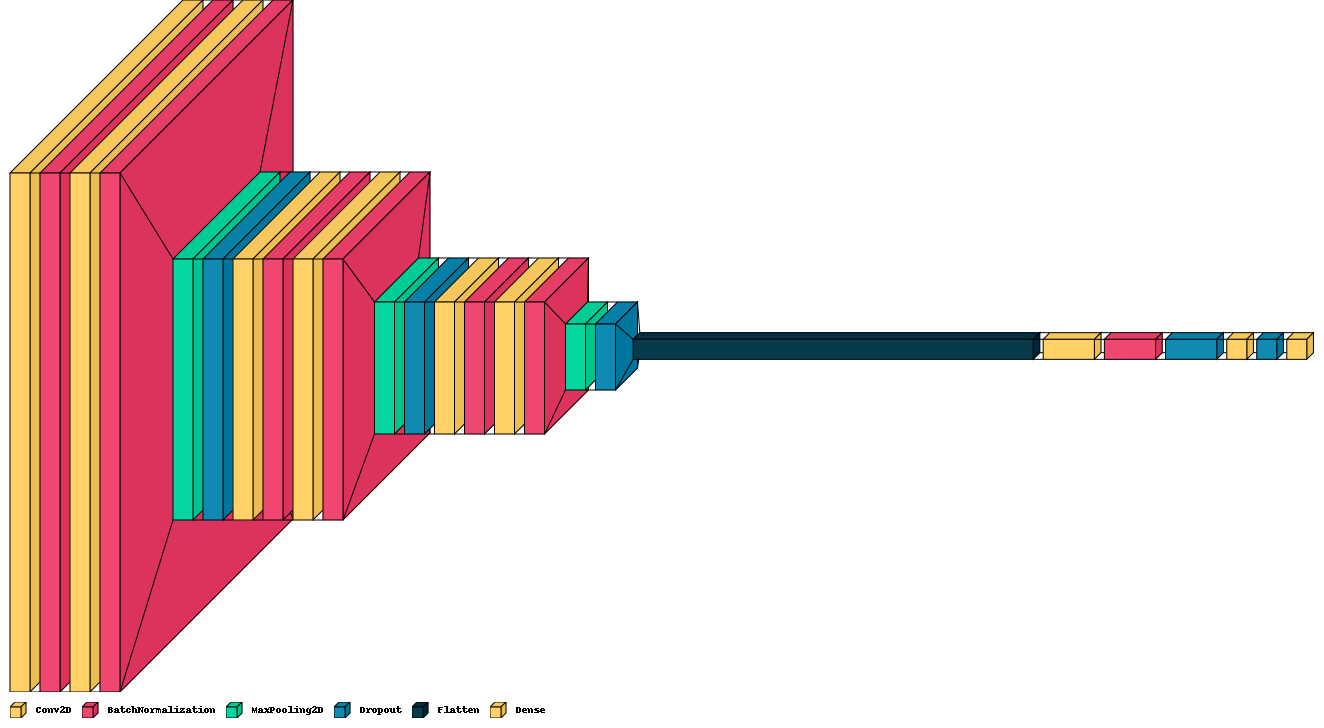

In [13]:
visualkeras.layered_view(model, scale_xy=3, legend=True)

<hr style="position: absolute; bottom: -8px; border: none; height: 4px; width:99%; background-color: #900C3F;">

### <span style="color: #900C3F;">Compiling the Model</span>

In this section, the compiled CNN model is prepared for training. The `compile()` function is used to configure the training process with the following settings:

- <span style="color: #900C3F;">**Optimizer:**</span> Adam optimizer is chosen for efficient gradient-based optimization.
- <span style="color: #900C3F;">**Loss Function:**</span> Sparse categorical cross-entropy is selected as the loss function. This is suitable for multi-class classification tasks where each image belongs to a single class.
- <span style="color: #900C3F;">**Metrics:**</span> Accuracy is chosen as the evaluation metric to monitor the model's performance during training.

<span style="color: #900C3F;">*By compiling the model with these settings, it becomes ready to be trained on the training dataset.*</span>

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 173, 173, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 173, 173, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 173, 173, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 173, 173, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 87, 87, 32)       0         
 )                                                               
                                                        

<hr style="position: absolute; bottom: -8px; border: none; height: 4px; width:99%; background-color: #900C3F;">

### <span style="color: #900C3F;">Early Stopping Callback</span>

The early stopping callback is a technique used during the training of neural networks to prevent overfitting and improve efficiency. It monitors a specified metric (in this case, validation loss) and stops the training process when the monitored metric stops improving for a specified number of epochs (patience).

- **<span style="color: #900C3F;">Monitor Metric:</span>** Validation loss (`'val_loss'`)
- **<span style="color: #900C3F;">Patience:</span>** 5 epochs
- **<span style="color: #900C3F;">Restore Best Weights:</span>** The model's weights are restored to the best weights observed during training when the training is stopped.

<span style="color: #900C3F;">This callback is a helpful tool to ensure that the model is not trained for too many epochs, preventing it from memorizing the training data and improving generalization to unseen data.</span>


In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

<hr style="position: absolute; bottom: -8px; border: none; height: 4px; width:99%; background-color: #900C3F;">

### <span style="color: #900C3F;">Model Training</span>

The neural network model is trained using the training data generator and validated using the validation data generator. The training process is set to run for 20 epochs. The early stopping callback is utilized to monitor the validation loss and stop the training if the validation loss does not improve for 5 consecutive epochs. This helps prevent overfitting and ensures that the model's performance is not compromised.

- **<span style="color: #900C3F;">Training Data Generator:</span>** The generator created using the training dataset.
- **<span style="color: #900C3F;">Validation Data Generator:</span>** The generator created using the validation dataset.
- **<span style="color: #900C3F;">Epochs:</span>** 20
- **<span style="color: #900C3F;">Callbacks:</span>** Early stopping callback to prevent overfitting by monitoring validation loss and restoring the best weights.

<span style="color: #900C3F;">The model's performance metrics, including accuracy and loss, are tracked during the training process and can be visualized to evaluate the model's learning progress.</span>


In [16]:
history = model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[early_stopping])

Epoch 1/20


2023-08-14 12:00:30.122017: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


411/411 [==============================] - 158s 343ms/step - loss: 0.0980 - accuracy: 0.9674 - val_loss: 12.8535 - val_accuracy: 0.2000
Epoch 2/20
411/411 [==============================] - 139s 337ms/step - loss: 0.0434 - accuracy: 0.9857 - val_loss: 0.0881 - val_accuracy: 0.9732
Epoch 3/20
411/411 [==============================] - 138s 337ms/step - loss: 0.0318 - accuracy: 0.9896 - val_loss: 0.0725 - val_accuracy: 0.9779
Epoch 4/20
411/411 [==============================] - 140s 339ms/step - loss: 0.0282 - accuracy: 0.9905 - val_loss: 0.0255 - val_accuracy: 0.9915
Epoch 5/20
411/411 [==============================] - 138s 335ms/step - loss: 0.0239 - accuracy: 0.9926 - val_loss: 6.1983 - val_accuracy: 0.4362
Epoch 6/20
411/411 [==============================] - 138s 335ms/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 8.9917 - val_accuracy: 0.4076
Epoch 7/20
411/411 [==============================] - 138s 336ms/step - loss: 0.0282 - accuracy: 0.9910 - val_loss: 7.3684 - val_accur

### <span style="color: #900C3F;">Training Results and Analysis</span>

<span style="color: #900C3F;">In conclusion, while the initial training showed signs of overfitting, the model was able to recover and improve its generalization performance through the training epochs. Further steps could involve fine-tuning hyperparameters, increasing the diversity of training data, or modifying the model architecture to achieve even better results.</span>


<hr style="position: absolute; bottom: -8px; border: none; height: 4px; width:99%; background-color: #900C3F;">

### <span style="color: #900C3F;">Training History Visualization<span/>

In [17]:
plot_training_history_with_plotly(history)

<hr style="position: absolute; bottom: -8px; border: none; height: 4px; width:99%; background-color: #900C3F;">

### <span style="color: #900C3F;">Model Evaluation on Test Data</span>

After training the model and monitoring its performance on the validation data, it's crucial to assess its generalization ability on unseen test data. The model's evaluation on the test data provides insights into its real-world performance and whether it has successfully learned to make accurate predictions on new examples.

#### <span style="color: #900C3F;">Evaluation Results</span>

The model's performance on the test data is evaluated using the `evaluate` function. The output of the evaluation is presented below:

- **<span style="color: #900C3F;">Loss:</span>** The calculated loss value indicates the model's ability to minimize the discrepancy between predicted and actual labels. A lower loss value suggests better accuracy and alignment with the ground truth.

- **<span style="color: #900C3F;">Accuracy:</span>** The accuracy reflects the proportion of correctly predicted labels among all test samples. A higher accuracy value indicates that the model is making accurate predictions.

These evaluation metrics provide a clear understanding of the model's performance on unseen data. An accuracy of approximately 99% indicates that the model has learned well from the training data and can generalize effectively to new examples.

<span style="color: #900C3F;">It's important to note that while the test accuracy is high, it's always recommended to consider other aspects such as the dataset's distribution, potential class imbalances, and domain-specific challenges when assessing model performance. Regular evaluation and monitoring are essential to ensure the model maintains its predictive accuracy across various scenarios.</span>


In [18]:
score1 = model.evaluate(test_generator, verbose=1)

88/88 [==============================] - 18s 204ms/step - loss: 0.0314 - accuracy: 0.9894


<hr style="position: absolute; bottom: -8px; border: none; height: 4px; width:99%; background-color: #900C3F;">

## <span style="color: #900C3F;">Confusion Matrix Analysis</span>

The confusion matrix is a crucial tool for assessing the performance of a classification model. It provides a visual representation of how well the model's predictions align with the true labels across different classes.

#### <span style="color: #900C3F;">Confusion Matrix Overview</span>

The confusion matrix displayed below provides insights into the model's performance on the test data:

- The matrix is organized into rows and columns, where each row corresponds to a true class, and each column corresponds to a predicted class.

- The diagonal elements represent the number of correct predictions for each class, while off-diagonal elements represent misclassifications.


#### <span style="color: #900C3F;">Model Performance and Implications</span>

The high values on the diagonal (True Positives) indicate that the model has learned the distinguishing features of each class and can predict them accurately. The low misclassification counts (off-diagonal elements) further confirm the model's effectiveness.

The provided confusion matrix suggests that the model has achieved high accuracy in predicting the different rice varieties. However, it's essential to consider the context of the application, the potential cost of misclassifications, and domain-specific requirements when evaluating the model's performance. In some cases, class-specific performance metrics, such as precision, recall, and F1-score, can provide a more detailed understanding of the model's strengths and weaknesses.

#### <span style="color: #900C3F;">**Overall, the provided results indicate that the model has performed exceptionally well on the test data, with a high level of accuracy and minimal misclassifications.**</span>


<hr style="position: absolute; bottom: -8px; border: none; height: 4px; width:99%; background-color: #900C3F;">

In [19]:
y_pred = model.predict(test_generator)

88/88 [==============================] - 18s 204ms/step


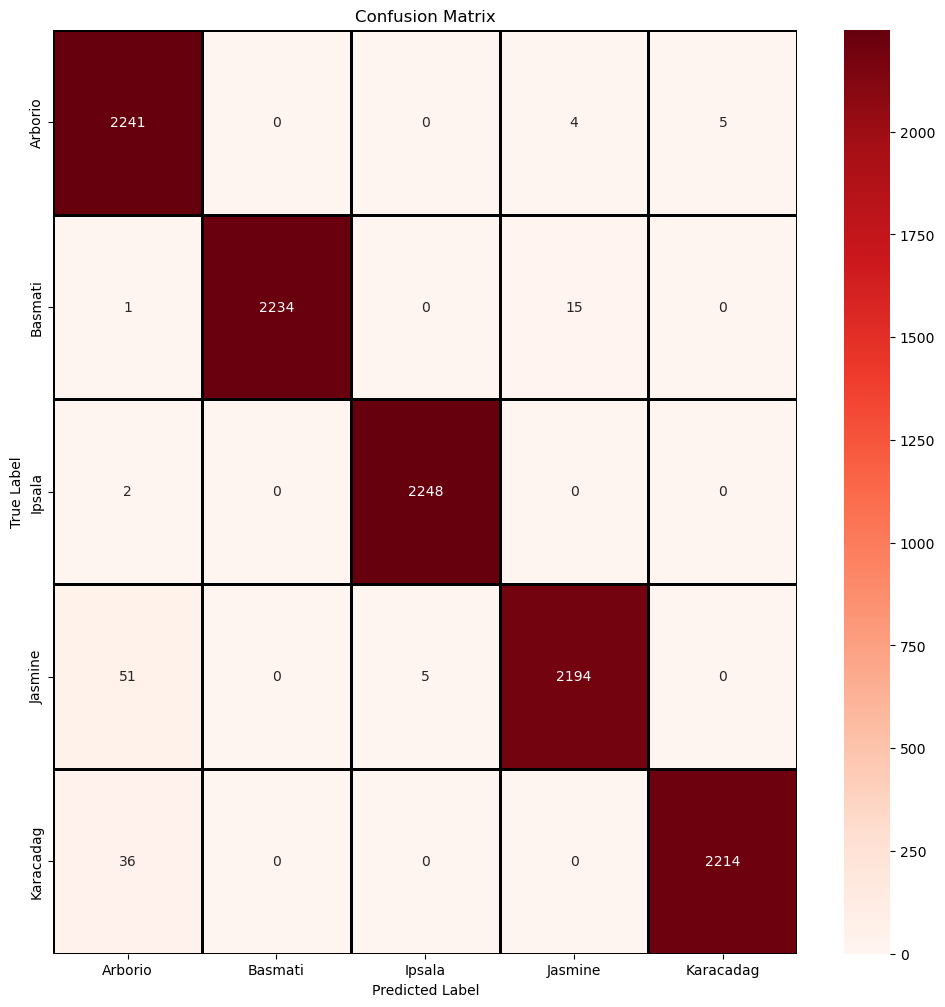

In [20]:
y_pred_labels = np.argmax(y_pred, axis=1)

confusion_mtx = confusion_matrix(test_generator.classes, y_pred_labels)

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=1,
            linecolor="black", 
            fmt='d',
            ax=ax,
            cmap="Reds")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_generator.class_indices)
ax.yaxis.set_ticklabels(rice_classes)
plt.title("Confusion Matrix")
plt.show()

<div style="width: 100%; height: 100px; background-color: #D8D9DA; border: 3px solid #900C3F; text-align: center; line-height: 100px; color: #161616; font-size: 24px; font-weight: bold; border-radius:6px;">
    Thanks for paying attention to this notebook ♥
</div>